In [108]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from modules.constantsAndVectors import gammaPositiveH
from modules.utilityFunctions import autocorrelationExponential, autocorrelationProduct
from scipy.optimize import curve_fit
from scipy.stats import linregress
from statsmodels.tsa.stattools import acf


In [109]:
simulationPath = Path.cwd().parents[1] / \
    'data' / 'nullH' / 'nullH8MilionSamples'
tmp = np.load(simulationPath / 'momentScaling' / 'allMeans.npy')
tmp2 = np.load(simulationPath / 'momentScaling' / 'allMoments.npy')

In [110]:
dataPath = Path.cwd().parents[1] / 'data'
susmanPathScaling = dataPath / 'realData' / 'Susman' / \
    'longLineages' / 'momentScaling'
tanouchi25PathScaling = dataPath / 'realData' / 'Tanouchi' / \
    'Tanouchi25' / 'momentScaling'
tanouchi37PathScaling = dataPath / 'realData' / 'Tanouchi' / \
    'Tanouchi37' / 'momentScaling'

In [111]:
fitSusman: pd.DataFrame = pd.read_csv(susmanPathScaling / 'momentsFit.csv')
fitTanouchi25: pd.DataFrame = pd.read_csv(
    tanouchi25PathScaling / 'momentsFit.csv')
fitTanouchi37: pd.DataFrame = pd.read_csv(
    tanouchi37PathScaling / 'momentsFit.csv')

meansSusman: np.array = np.load(susmanPathScaling / 'allMeans.npy')
momentsSusman: np.array = np.load(susmanPathScaling / 'allMoments.npy')
meansTanouchi25: np.array = np.load(tanouchi25PathScaling / 'allMeans.npy')
momentsTanouchi25: np.array = np.load(tanouchi25PathScaling / 'allMoments.npy')
meansTanouchi37: np.array = np.load(tanouchi37PathScaling / 'allMeans.npy')
momentsTanouchi37: np.array = np.load(tanouchi37PathScaling / 'allMoments.npy')
outliersTanouchi37: np.array = np.where(momentsTanouchi37[1] > 20)[0]
allFits: List[pd.DataFrame] = [fitSusman, fitTanouchi25, fitTanouchi37]
tanouchi37FinalMoments = np.delete(
    momentsTanouchi37, outliersTanouchi37, axis=1)
tanouchi37FinalMeans = np.delete(meansTanouchi37, outliersTanouchi37, axis=1)
allmeans: List[np.array] = [meansSusman, meansTanouchi25, tanouchi37FinalMeans]
allMoments: List[np.array] = [momentsSusman,
                              momentsTanouchi25, tanouchi37FinalMoments]
allTitles: List[str] = ['Stawsky et al.', 'Tanouchi 25', 'Tanouchi37']


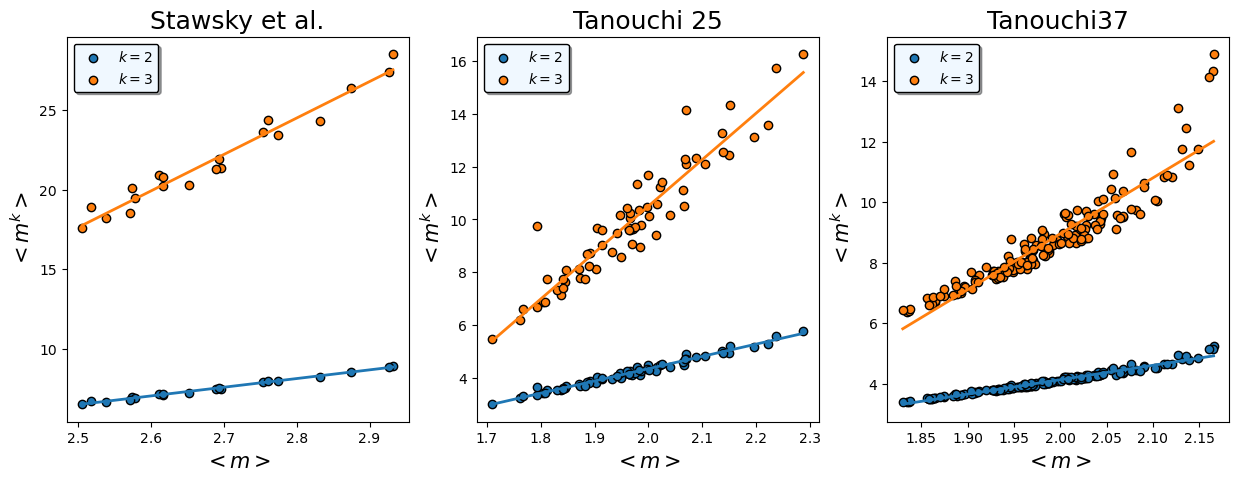

In [112]:
maxK: int = 2
fig, ax_ = plt.subplots(1, 3, figsize=(15, 5))
for fit, mean, moment, ax, title in zip(allFits, allmeans, allMoments, ax_.flatten(), allTitles):
    for i in range(maxK):
        xAxis = np.linspace(np.min(mean[i, :]), np.max(mean[i, :]), 1000)
        ax.scatter(mean[i, :], moment[i, :],
                   label=f'$k = {i + 2}$', edgecolor='black')
        ax.plot(xAxis, xAxis * fit.iloc[i, :]['slope'] +
                fit.iloc[i, :]['intercept'], zorder=2, linewidth=2)

    ax.set_title(title, fontsize=18)
    ax.set_xlabel('$<m>$', fontsize=15)
    ax.set_ylabel('$<m^k>$', fontsize=15)
    ax.legend(facecolor='aliceblue', edgecolor='black', shadow=True)

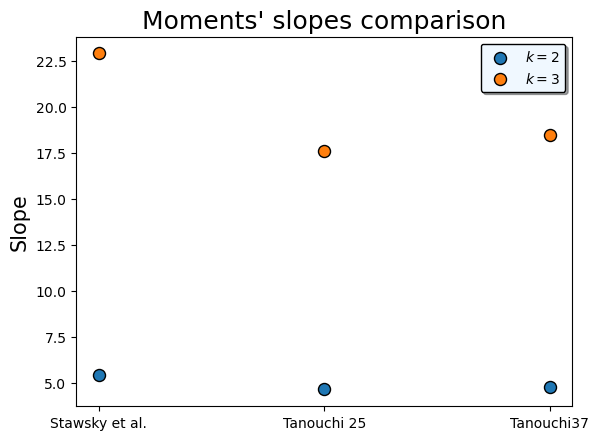

In [113]:
slopes2 = [fit['slope'][0] for fit in allFits]
slopes3 = [fit['slope'][1] for fit in allFits]
plt.scatter(allTitles, slopes2, label='$k = 2$', edgecolor='black', s=75)
plt.scatter(allTitles, slopes3, label='$k = 3$', edgecolor='black', s=75)
plt.ylabel('Slope', fontsize=15)
plt.legend(facecolor='aliceblue', shadow=True, edgecolor='black')
_ = plt.title('Moments\' slopes comparison', fontsize=18)


## Simulations


In [114]:
abosrbingHPath: Path = dataPath / 'positiveH' / 'absorbingHHDeciding'
fitAbsorbingHTry1: pd.DataFrame = pd.read_csv(
    abosrbingHPath / 'momentScaling' / 'momentsFit.csv')
meansAbsorbingHTry1: np.array = np.load(
    abosrbingHPath / 'momentScaling' / 'allMeans.npy')
momentsAbsorbingHTry1: np.array = np.load(
    abosrbingHPath / 'momentScaling' / 'allMoments.npy')

abosrbingHPathShort: Path = dataPath / 'positiveH' / 'absorbingHHDecidingShort'
fitAbsorbingHTry1Short: pd.DataFrame = pd.read_csv(
    abosrbingHPathShort / 'momentScaling' / 'momentsFit.csv')
meansAbsorbingHTry1Short: np.array = np.load(
    abosrbingHPathShort / 'momentScaling' / 'allMeans.npy')
momentsAbsorbingHTry1Short: np.array = np.load(
    abosrbingHPathShort / 'momentScaling' / 'allMoments.npy')


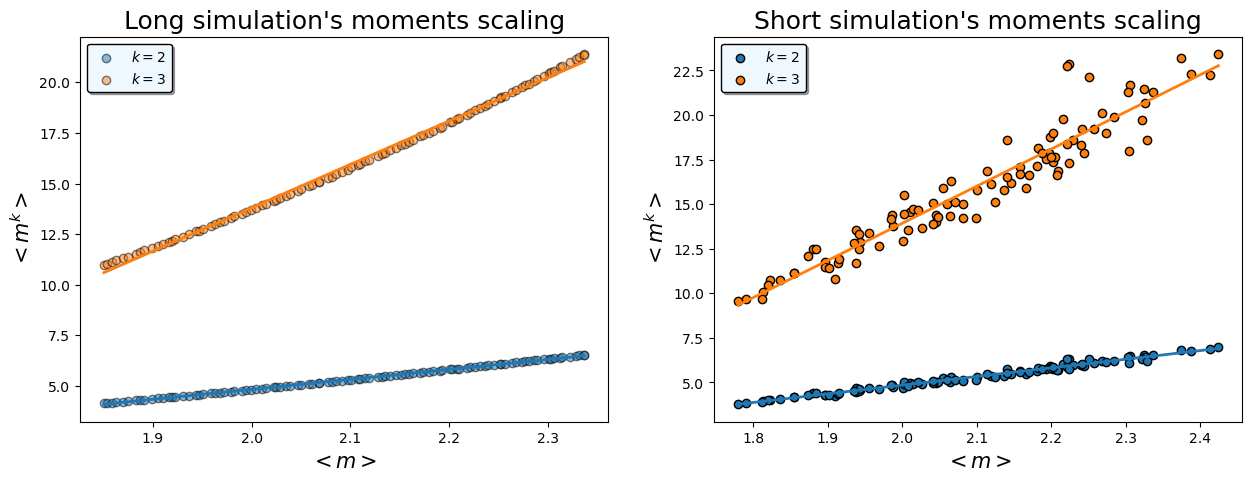

In [115]:
fig, ax_ = plt.subplots(1, 2, figsize=(15, 5))
ax, ax1 = ax_.flatten()
xAxis = np.linspace(np.min(meansAbsorbingHTry1[0, :]), np.max(
    meansAbsorbingHTry1[0, :]))
for i in range(maxK):
    ax.scatter(
        meansAbsorbingHTry1[i, :], momentsAbsorbingHTry1[i, :], label=f'$k = {i + 2}$', edgecolor='black', alpha=.5)
    ax.plot(xAxis, xAxis * fitAbsorbingHTry1.iloc[i, :]
            ['slope'] + fitAbsorbingHTry1.iloc[i, :]['intercept'], zorder=2, linewidth=2)
ax.set_title('Long simulation\'s moments scaling', fontsize=18)
ax.set_xlabel('$<m>$', fontsize=15)
ax.set_ylabel('$<m^k>$', fontsize=15)
_ = ax.legend(facecolor='aliceblue', shadow=True, edgecolor='black')

xAxis = np.linspace(np.min(meansAbsorbingHTry1Short[0, :]), np.max(
    meansAbsorbingHTry1Short[0, :]))
for i in range(maxK):
    ax1.scatter(
        meansAbsorbingHTry1Short[i, :], momentsAbsorbingHTry1Short[i, :], label=f'$k = {i + 2}$', edgecolor='black')
    ax1.plot(xAxis, xAxis * fitAbsorbingHTry1Short.iloc[i, :]
             ['slope'] + fitAbsorbingHTry1Short.iloc[i, :]['intercept'], linewidth=2)

ax1.set_title('Short simulation\'s moments scaling', fontsize=18)
ax1.set_xlabel('$<m>$', fontsize=15)
ax1.set_ylabel('$<m^k>$', fontsize=15)
_ = ax1.legend(facecolor='aliceblue', shadow=True, edgecolor='black')


In [116]:
slopes2 += [fitAbsorbingHTry1['slope'][0], fitAbsorbingHTry1Short['slope'][0]]
slopes3 += [fitAbsorbingHTry1['slope'][1], fitAbsorbingHTry1Short['slope'][1]]
allTitles += ['Long Simulation', 'Short Simulation']


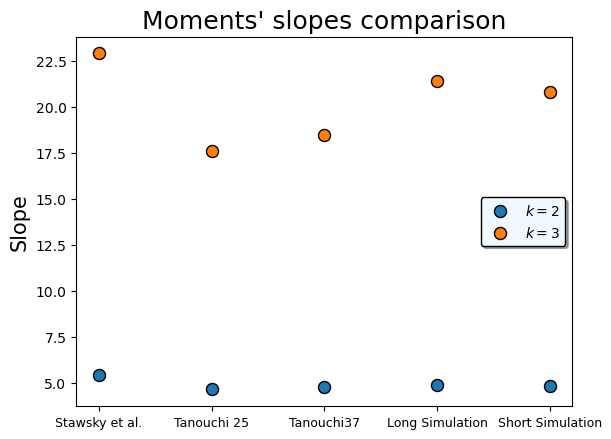

In [117]:
plt.scatter(allTitles, slopes2, label='$k = 2$', edgecolor='black', s=75)
plt.scatter(allTitles, slopes3, label='$k = 3$', edgecolor='black', s=75)
plt.ylabel('Slope', fontsize=15)
plt.legend(facecolor='aliceblue', shadow=True, edgecolor='black')
_ = plt.title('Moments\' slopes comparison', fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=9)


## Simulation general behaviour


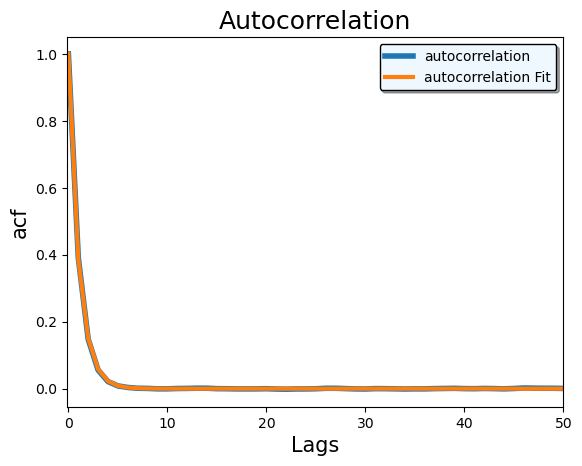

In [140]:
resultsPath = abosrbingHPath / 'correlationParameters.csv'
acorrPath = abosrbingHPath / 'autoCorrelations.npy'
aCorrExample = np.load(acorrPath)[0, :]
xAxis = np.linspace(0, int(2e6), int(2e6))
plt.plot(range(len(aCorrExample)), aCorrExample,
         linewidth=4, label='autocorrelation')
plt.plot(autocorrelationExponential(xAxis, pd.read_csv(resultsPath)['constant'][0], pd.read_csv(
    resultsPath)['correlation'][0]), linewidth=3, label='autocorrelation Fit')
plt.xlim(left=-0.1, right=50)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('acf', fontsize=15)
plt.title('Autocorrelation', fontsize=18)
_ = plt.legend(facecolor='aliceblue', shadow=True, edgecolor='black')


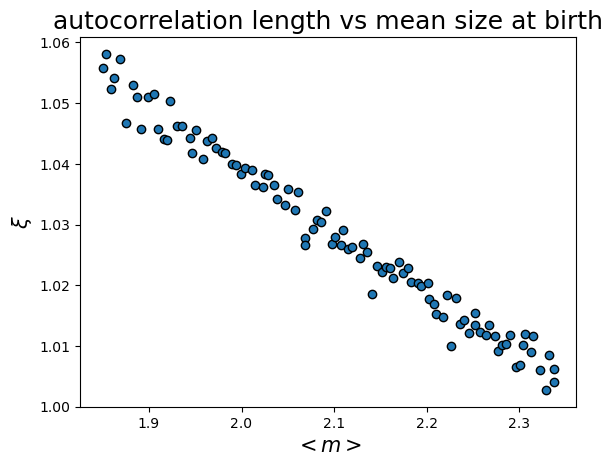

In [141]:
result = linregress(meansAbsorbingHTry1[0, :], pd.read_csv(
    resultsPath)['correlation'])
plt.scatter(meansAbsorbingHTry1[0, :], pd.read_csv(
    resultsPath)['correlation'], edgecolor='black')
plt.xlabel('$<m>$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
_ = plt.title('autocorrelation length vs mean size at birth', fontsize=18)


## Short lineages


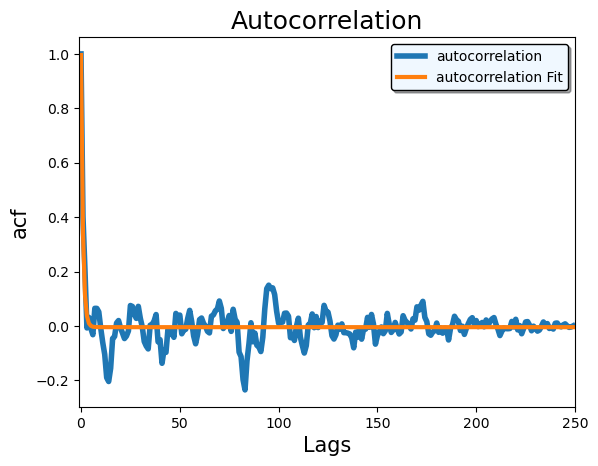

In [147]:
resultsPathShort = abosrbingHPathShort / 'correlationParameters.csv'
timeSeriesPath = abosrbingHPathShort / 'timeSerieses.npy'
aCorrExample = acf(np.load(timeSeriesPath)[0, :], nlags=len(
    np.load(timeSeriesPath)[0, :]) - 1)
xAxis = np.linspace(0, int(2e6), int(2e6))
plt.plot(range(len(aCorrExample)), aCorrExample,
         linewidth=4, label='autocorrelation')
plt.plot(autocorrelationExponential(xAxis, pd.read_csv(resultsPathShort)['constant'][0], pd.read_csv(
    resultsPathShort)['correlation'][0]), linewidth=3, label='autocorrelation Fit')
plt.xlim(left=-1, right=250)
plt.xlabel('Lags', fontsize=15)
plt.ylabel('acf', fontsize=15)
plt.title('Autocorrelation', fontsize=18)
_ = plt.legend(facecolor='aliceblue', shadow=True, edgecolor='black')

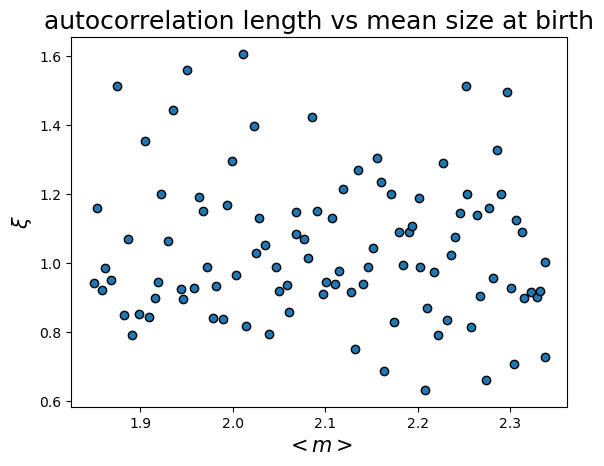

In [146]:
result = linregress(meansAbsorbingHTry1[0, :], pd.read_csv(
    resultsPathShort)['correlation'])
plt.scatter(meansAbsorbingHTry1[0, :], pd.read_csv(
    resultsPathShort)['correlation'], edgecolor='black')
plt.xlabel('$<m>$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
_ = plt.title('autocorrelation length vs mean size at birth', fontsize=18)
